In [1]:
import matplotlib.pyplot as graph
import numpy as np
from numpy.fft import fft2, ifft2
import math
import cv2
from scipy.signal import gaussian, convolve2d

In [2]:
def blur(img, kernel_size = 3):
	dummy = np.copy(img)
	h = np.eye(kernel_size) / kernel_size
	dummy = convolve2d(dummy, h, mode = 'valid')
	return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h
    
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

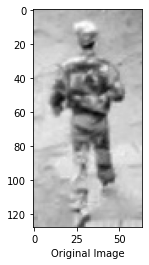

In [3]:
image = cv2.imread('./data/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_h = image.shape[0]
img_w = image.shape[1]
graph.figure()
graph.xlabel("Original Image")
graph.gray()
graph.imshow(image)  # 显示原图像

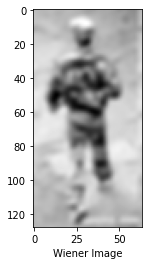

In [4]:
kernel = gaussian_kernel(5)
filtered_img = wiener_filter(image, kernel, K = 10)

graph.figure()
graph.xlabel("Wiener Image")
graph.gray()
graph.imshow(filtered_img)  # 显示原图像